Epoch 1/50
57/57 [==============================] - 2s 10ms/step - loss: 0.0231 - val_loss: 4.8156e-04
Epoch 2/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 6.9010e-05
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 2.8237e-05
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 3.4758e-05
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 2.7836e-05
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 2.8516e-05
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 5.4591e-05
Epoch 8/50
57/57 [==============================] - 0s 5ms/step - loss: 9.1868e-04 - val_loss: 7.0770e-05
Epoch 9/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 4.0415e-05
Epoch 10/50
57/57 [==============================] - 0s 5ms/step - loss: 9.46

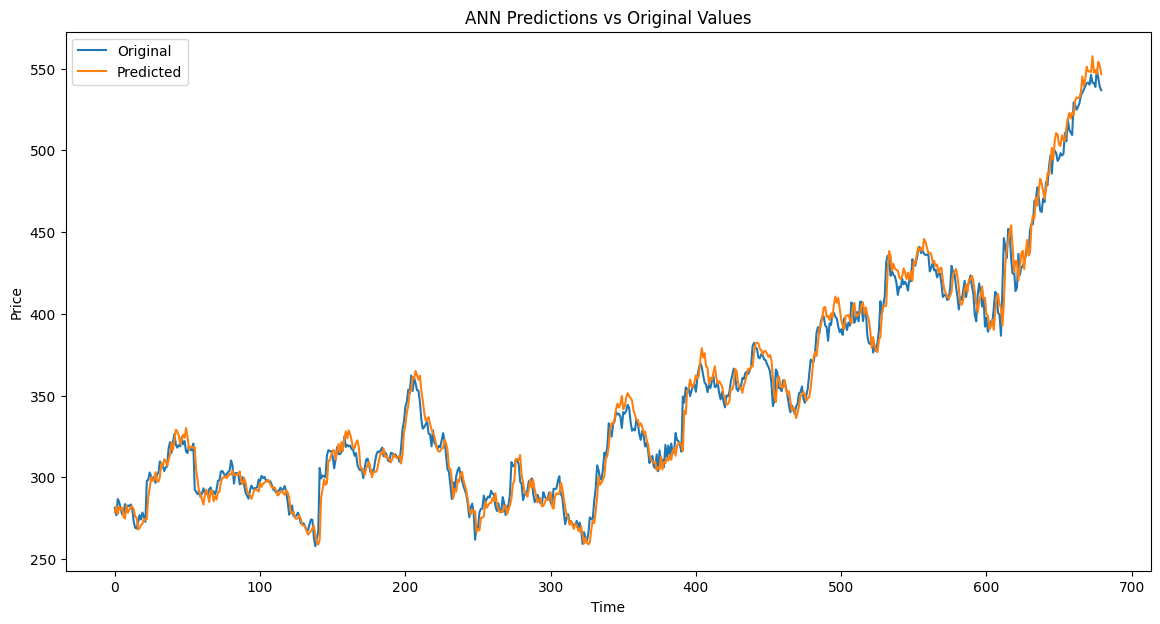

RMSE: 7.9432449209852845


In [14]:
# Importing necessary libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('ICICIBANK.csv')

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

# Define the training data length
training_data_len = math.ceil(len(dataset) * 0.75)

# Split the data into training and testing sets
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 30:, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Define the ANN model
ann_model = Sequential()

# Add the first dense layer
ann_model.add(Dense(units=50, activation='relu', input_dim=x_train.shape[1]))

# Add the second dense layer
ann_model.add(Dense(units=50, activation='relu'))

# Add the output layer
ann_model.add(Dense(units=1))

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = ann_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Reshape the test data
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

# Predictions
ann_predictions = ann_model.predict(x_test)

# Rescale predictions
ann_predictions = scaler.inverse_transform(ann_predictions)

# Calculate RMSE
ann_rmse = np.sqrt(np.mean((ann_predictions - y_test)**2))

# Plot the predicted values against the original values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Original')
plt.plot(ann_predictions, label='Predicted')
plt.title('ANN Predictions vs Original Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

print("RMSE:", ann_rmse)
